## Preprocessing

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data = data.drop(['Serial No.'], axis=1)

In [4]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
# Renaming cols
old_cols = data.columns
data.columns = [x.strip().replace(' ', '_') for x in old_cols]
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


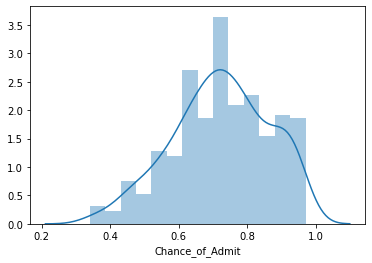

In [7]:
# Normal va
sb.distplot(data["Chance_of_Admit"])

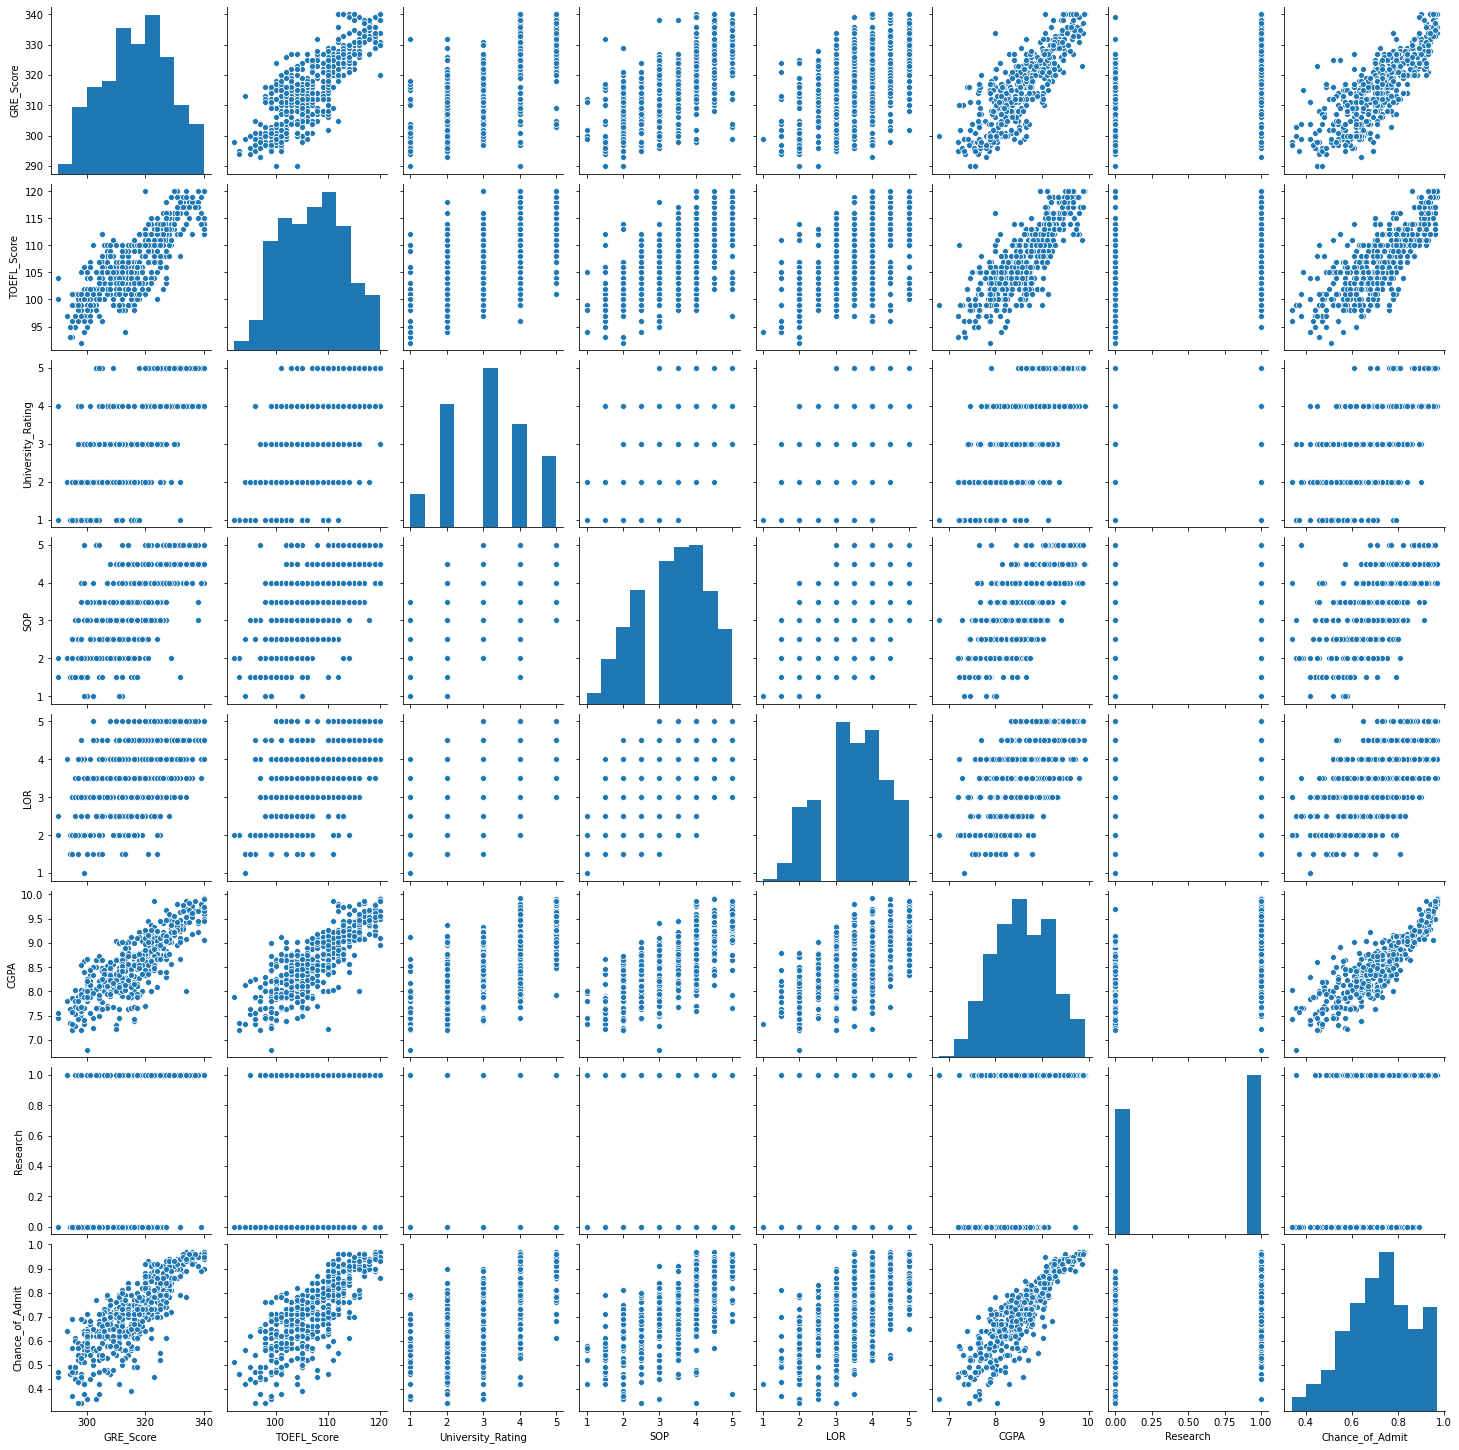

In [8]:
# Pair plot
sb.pairplot(data)

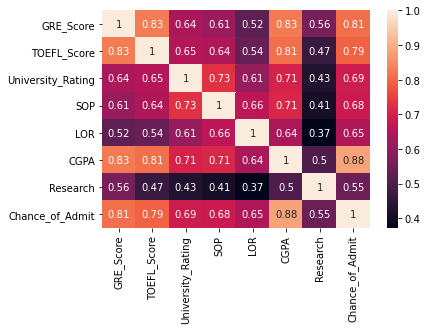

In [9]:
# Lets check the heat map of the data
sb.heatmap(data.corr(),annot = True)

In [10]:
# Outlier detection with VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif['Features'] = data.columns
# vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif


In [12]:
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor

# helpers
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
## ReUsable code
def split(X, y, test_size=0.2, shuffle=False, rand_state=None):
    ''' Just an automation for splitting
        @param: X, y, test_size=0.2, shuffle=False, rand_state=None
        @return: X_train, X_test, y_train, y_test
    '''
    if rand_state is None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = shuffle)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, rand_state = rand_state)
    return X_train, X_test, y_train, y_test

In [109]:
def regression_metrics(y_test, y_pred):
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    mean_root_squared_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = metrics.explained_variance_score(y_test, y_pred)
    adjusted_R2 = metrics.r2_score(y_test, y_pred)
    _df = pd.DataFrame(
        data=[mean_absolute_error, mean_squared_error, mean_root_squared_error, R2, adjusted_R2],
        index=['Mean Absolute Error', 'Mean Squared Error', 'Mean Sqrt Error', 'R-squared', 'Adjusted R-squared'],
        columns=['Value'],
    )
    return _df

## Model-1

In [110]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance_of_Admit'], axis=1)
y = data['Chance_of_Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [111]:
m1 = LinearRegression()
m1.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = m1.predict(X_test)
# print(y_pred)

In [153]:
DTR_m1 = DecisionTreeRegressor()
DTR_m1.fit(X_train, y_train)
y_pred_d = DTR_m1.predict(X_test)

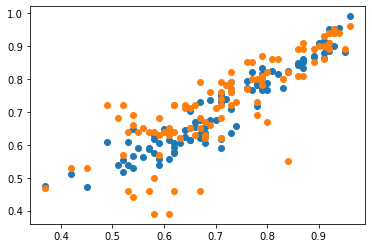

In [188]:
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_pred_d)

In [114]:
LR_m1_metrics = regression_metrics(y_test, y_pred)
LR_m1_metrics

,Value
Mean Absolute Error,0.033910
Mean Squared Error,0.001843
Mean Sqrt Error,0.042932
R-squared,0.898289
Adjusted R-squared,0.898287


In [157]:
DTR_m1_metrics = regression_metrics(y_test, y_pred_d)
DTR_m1_metrics

,Value
Mean Absolute Error,0.061600
Mean Squared Error,0.006992
Mean Sqrt Error,0.083618
R-squared,0.620833
Adjusted R-squared,0.614156


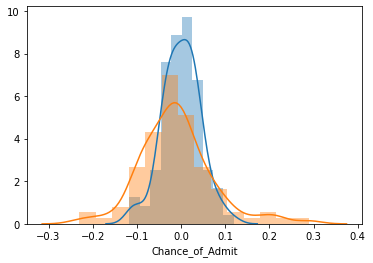

In [189]:
# Creating a histogram
sb.distplot((y_test - y_pred))
sb.distplot((y_test - y_pred_d))

In [116]:
# coeff
LR_m1_co = pd.DataFrame(m1.coef_, X.columns , columns=['Coeff'])
LR_m1_co

,Coeff
GRE_Score,0.001737
TOEFL_Score,0.002920
University_Rating,0.005717
SOP,-0.003305
LOR,0.022353
CGPA,0.118939
Research,0.024525


In [160]:
# Importance barchart

In [161]:
#visualizing coeff
data_frame = pd.DataFrame()
data_frame['Features'] = X.columns
data_frame['Importance'] = m1.coef_
data_frame = data_frame.sort_values(by=['Importance'], ascending=True)
print(data_frame)

            Features  Importance
3                SOP   -0.003305
0          GRE_Score    0.001737
1        TOEFL_Score    0.002920
2  University_Rating    0.005717
4                LOR    0.022353
6           Research    0.024525
5               CGPA    0.118939


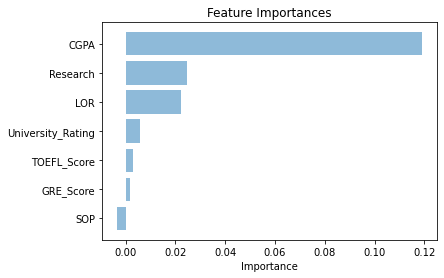

In [162]:
plt.barh([1,2,3,4,5,6,7], data_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], data_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## Model 2

In [120]:
from sklearn.model_selection import train_test_split
X=data.drop(['SOP','Chance_of_Admit'],axis=1)
y=data['Chance_of_Admit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
X.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [121]:
from sklearn.linear_model import LinearRegression
m2 = LinearRegression()
m2.fit(X_train,y_train)

LinearRegression()

In [122]:
predict2 = m2.predict(X_test)
# print(predict2)

In [164]:
DTR_m2 = DecisionTreeRegressor()
DTR_m2.fit(X_train, y_train)
predict2_d = DTR_m2.predict(X_test)

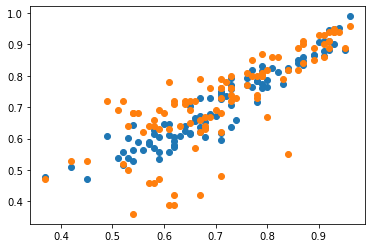

In [190]:
plt.scatter(y_test,predict2)
plt.scatter(y_test,predict2_d)

In [124]:
LR_m2_metrics = regression_metrics(y_test, predict2)
LR_m2_metrics

,Value
Mean Absolute Error,0.033172
Mean Squared Error,0.001783
Mean Sqrt Error,0.042231
R-squared,0.901619
Adjusted R-squared,0.901585


In [166]:
DTR_m2_metrics = regression_metrics(y_test, predict2_d)
DTR_m2_metrics

,Value
Mean Absolute Error,0.067900
Mean Squared Error,0.008703
Mean Sqrt Error,0.093290
R-squared,0.524108
Adjusted R-squared,0.519737


#### In Model2 we have dropped SOP and we get R^2 value > of Model1.

In [125]:
LR_m2_co = pd.DataFrame(m2.coef_, X.columns , columns=['Coeff'])
LR_m2_co

,Coeff
GRE_Score,0.001765
TOEFL_Score,0.002839
University_Rating,0.004854
LOR,0.021033
CGPA,0.117907
Research,0.024154


## Playing with Train-Test Split [Akash presents]

1. splitting dataset

    i. Training - 0.75, Test - 0.25
    
    ii. Training - 0.70, Test - 0.30
    
    iii. Training - 0.60, Test - 0.40
    
    iv. Training - 0.50, Test - 0.50

In [126]:
X = data.drop(['Chance_of_Admit'], axis=1)
y = data['Chance_of_Admit']

X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X,y,test_size = 0.25, shuffle=False)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,y,test_size = 0.30, shuffle=False)
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X,y,test_size = 0.40, shuffle=False)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X,y,test_size = 0.50, shuffle=False)


In [169]:
m2 = LinearRegression()
m2.fit(X_train_75, y_train_75)

m3 = LinearRegression()
m3.fit(X_train_70, y_train_70)

m4 = LinearRegression()
m4.fit(X_train_60, y_train_60)

m5 = LinearRegression()
m5.fit(X_train_50, y_train_50)

LinearRegression()

In [170]:
DTR_m_75_25 = DecisionTreeRegressor()
DTR_m_75_25.fit(X_train_75, y_train_75)

DTR_m_70_30 = DecisionTreeRegressor()
DTR_m_70_30.fit(X_train_70, y_train_70)

DTR_m_60_40 = DecisionTreeRegressor()
DTR_m_60_40.fit(X_train_60, y_train_60)

DTR_m_50_50 = DecisionTreeRegressor()
DTR_m_50_50.fit(X_train_50, y_train_50)

DecisionTreeRegressor()

In [171]:
y_pred2 = m2.predict(X_test_25)
y_pred2_d = DTR_m_75_25.predict(X_test_25)
# print("m2 [ 75, 25 ]\n",y_pred2,"\n---------------------------------------------------")

y_pred3 = m3.predict(X_test_30)
y_pred3_d = DTR_m_70_30.predict(X_test_30)
# print("m3 [ 70, 30 ]\n",y_pred3,"\n---------------------------------------------------")

y_pred4 = m4.predict(X_test_40)
y_pred4_d = DTR_m_60_40.predict(X_test_40)
# print("m4 [ 60, 40 ]\n",y_pred4,"\n---------------------------------------------------")

y_pred5 = m5.predict(X_test_50)
y_pred5_d = DTR_m_50_50.predict(X_test_50)
# print("m5 [ 50, 50 ] \n",y_pred5,"\n---------------------------------------------------")

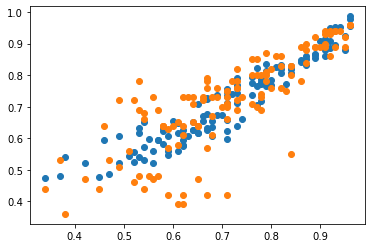

In [172]:
plt.scatter(y_test_25, y_pred2)
plt.scatter(y_test_25, y_pred2_d)

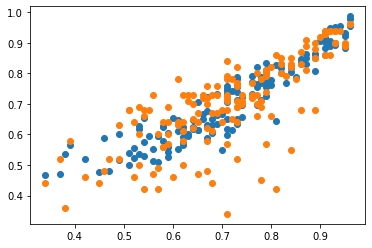

In [173]:
plt.scatter(y_test_30, y_pred3)
plt.scatter(y_test_30, y_pred3_d)

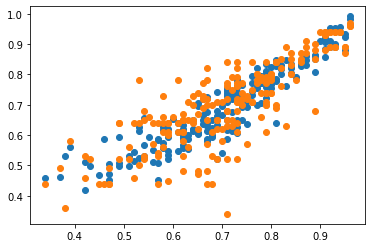

In [174]:
plt.scatter(y_test_40, y_pred4)
plt.scatter(y_test_40, y_pred4_d)

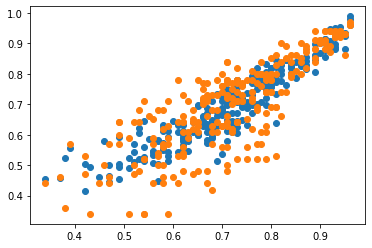

In [175]:
plt.scatter(y_test_50, y_pred5)
plt.scatter(y_test_50, y_pred5_d)

In [176]:
print("\n\nFor m2 [ 75, 25 ]")
LR_m_75_25_metrics = regression_metrics(y_test_25, y_pred2)
DTR_m_75_25_metrics = regression_metrics(y_test_25, y_pred2_d)
print(LR_m_75_25_metrics)
print(DTR_m_75_25_metrics)

print("\n\nFor m3 [ 70, 30 ]")
LR_m_70_30_metrics = regression_metrics(y_test_30, y_pred3)
DTR_m_70_30_metrics = regression_metrics(y_test_30, y_pred3_d)
print(LR_m_70_30_metrics)
print(DTR_m_70_30_metrics)

print("\n\nFor m4 [ 60, 40 ]")
LR_m_60_40_metrics = regression_metrics(y_test_40, y_pred4)
DTR_m_60_40_metrics = regression_metrics(y_test_40, y_pred4_d)
print(LR_m_60_40_metrics)
print(DTR_m_60_40_metrics)

print("\n\nFor m5 [ 50, 50 ]")
LR_m_50_50_metrics = regression_metrics(y_test_50, y_pred5)
DTR_m_50_50_metrics = regression_metrics(y_test_50, y_pred5)
print(LR_m_50_50_metrics)
print(DTR_m_50_50_metrics)



For m2 [ 75, 25 ]
                        Value
Mean Absolute Error  0.035772
Mean Squared Error   0.002236
Mean Sqrt Error      0.047281
R-squared            0.894180
Adjusted R-squared   0.893365
                        Value
Mean Absolute Error  0.063680
Mean Squared Error   0.008277
Mean Sqrt Error      0.090977
R-squared            0.607047
Adjusted R-squared   0.605190


For m3 [ 70, 30 ]
                        Value
Mean Absolute Error  0.040168
Mean Squared Error   0.002829
Mean Sqrt Error      0.053188
R-squared            0.862756
Adjusted R-squared   0.861282
                        Value
Mean Absolute Error  0.068400
Mean Squared Error   0.009775
Mean Sqrt Error      0.098867
R-squared            0.525596
Adjusted R-squared   0.520693


For m4 [ 60, 40 ]
                        Value
Mean Absolute Error  0.039552
Mean Squared Error   0.002801
Mean Sqrt Error      0.052927
R-squared            0.854781
Adjusted R-squared   0.849322
                        Value
Mean Absol

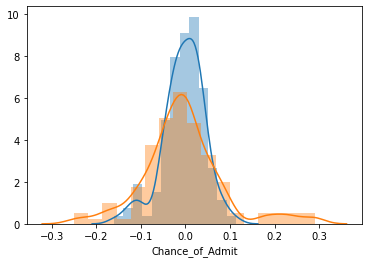

In [179]:
sb.distplot((y_test_25 - y_pred2))
sb.distplot((y_test_25 - y_pred2_d))

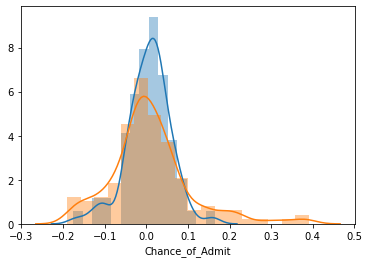

In [180]:
sb.distplot((y_test_30 - y_pred3))
sb.distplot((y_test_30 - y_pred3_d))

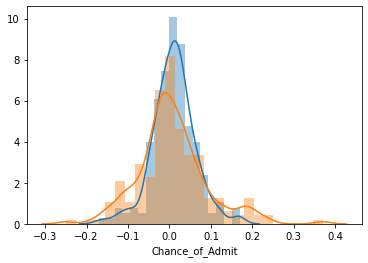

In [181]:
sb.distplot((y_test_40 - y_pred4))
sb.distplot((y_test_40 - y_pred4_d))

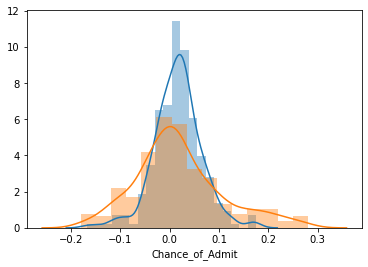

In [182]:
sb.distplot((y_test_50 - y_pred5))
sb.distplot((y_test_50 - y_pred5_d))

In [138]:
LR_m_75_25_co = pd.DataFrame(m2.coef_, X.columns , columns=['Coeff'])
LR_m_75_25_co

,Coeff
GRE_Score,0.001606
TOEFL_Score,0.003145
University_Rating,0.007250
SOP,-0.004648
LOR,0.023607
CGPA,0.114645
Research,0.022725


In [139]:
LR_m_70_30_co = pd.DataFrame(m3.coef_, X.columns , columns=['Coeff'])
LR_m_70_30_co

,Coeff
GRE_Score,0.001549
TOEFL_Score,0.003246
University_Rating,0.009315
SOP,-0.004383
LOR,0.024933
CGPA,0.112351
Research,0.021942


In [140]:
LR_m_60_40_co = pd.DataFrame(m4.coef_, X.columns , columns=['Coeff'])
LR_m_60_40_co

,Coeff
GRE_Score,0.001768
TOEFL_Score,0.002903
University_Rating,0.007715
SOP,-0.005315
LOR,0.028284
CGPA,0.117369
Research,0.019229


In [141]:
LR_m_50_50_co = pd.DataFrame(m5.coef_, X.columns , columns=['Coeff'])
LR_m_50_50_co

,Coeff
GRE_Score,0.001957
TOEFL_Score,0.002954
University_Rating,0.007104
SOP,-0.005433
LOR,0.027074
CGPA,0.116319
Research,0.021870


In [196]:
pd.DataFrame(
            [LR_m1_metrics.Value, DTR_m1_metrics.Value, 
             LR_m2_metrics.Value, DTR_m2_metrics.Value,
             LR_m_75_25_metrics.Value, DTR_m_75_25_metrics.Value, 
             LR_m_70_30_metrics.Value, DTR_m_70_30_metrics.Value,
             LR_m_60_40_metrics.Value, DTR_m_60_40_metrics.Value, 
             LR_m_50_50_metrics.Value, DTR_m_50_50_metrics.Value,              
            ], 
             index = ['Model-1', 'DT Model-1', 'Model-2',  'DT Model-2', 
                      'Model-75-25', 'DT Model-75-25', 'Model-70-30', 'DT Model-70-30',
                      'Model-60-40', 'DT Model-60-40', 'Model-50-50', 'DT Model-50-50', 
                     ]
            )

,Mean Absolute Error,Mean Squared Error,Mean Sqrt Error,R-squared,Adjusted R-squared
Model-1,0.033910,0.001843,0.042932,0.898289,0.898287
DT Model-1,0.061600,0.006992,0.083618,0.620833,0.614156
Model-2,0.033172,0.001783,0.042231,0.901619,0.901585
DT Model-2,0.067900,0.008703,0.093290,0.524108,0.519737
Model-75-25,0.035772,0.002236,0.047281,0.894180,0.893365
DT Model-75-25,0.063680,0.008277,0.090977,0.607047,0.605190
Model-70-30,0.040168,0.002829,0.053188,0.862756,0.861282
DT Model-70-30,0.068400,0.009775,0.098867,0.525596,0.520693
Model-60-40,0.039552,0.002801,0.052927,0.854781,0.849322
DT Model-60-40,0.061100,0.007225,0.085000,0.614243,0.611376
